## Observations and Insights 

In [243]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_labdata = pd.merge(mouse_metadata, study_results, how= "outer", on="Mouse ID")

# Display the data table for preview
combined_labdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [199]:
# Checking the number of mice.

countmice= len(combined_labdata["Mouse ID"].unique())
countmice

249

In [200]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_labdata_duplicated = combined_labdata.duplicated(subset=["Mouse ID", "Timepoint"])
combined_labdata_duplicated


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [201]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_labdata_duplicates = combined_labdata[combined_labdata.duplicated()]
combined_labdata_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
uniqueList = combined_labdata.drop_duplicates(["Mouse ID","Timepoint"])
#uniqueList
uniqueList.count()


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [203]:
# Checking the number of mice in the clean DataFrame.

countUniquemice= len(uniqueList["Mouse ID"].unique())
countUniquemice

249

## Summary Statistics

In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumorVolume = uniqueList['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_regimen = uniqueList.groupby(['Drug Regimen'])
grouped_regimen
mean_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
mean_volume
median_volume = grouped_regimen['Tumor Volume (mm3)'].median()
median_volume
var_volume = grouped_regimen['Tumor Volume (mm3)'].var()
var_volume
stdev_volume=grouped_regimen['Tumor Volume (mm3)'].std()
stdev_volume
sem_volume=grouped_regimen['Tumor Volume (mm3)'].sem()
sem_volume


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [259]:
# Assemble the resulting series into a single summary dataframe.
Summary1 = pd.DataFrame ({
    "Mean": mean_volume, 
    "Median": median_volume,
    "Variance": var_volume, 
    "Std. Dev.": stdev_volume,
    "SEM": sem_volume
    })
Summary1

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [264]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = uniqueList.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

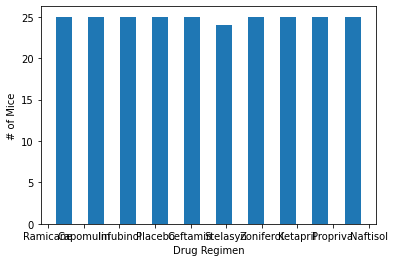

In [205]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.hist(mouse_metadata["Drug Regimen"], rwidth = 0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
plt.show()


In [206]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
Drug_regimen_list = uniqueList["Drug Regimen"].unique()
#Drug_regimen_list

regimen_group = mouse_metadata.groupby('Drug Regimen')
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen



Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Mice')

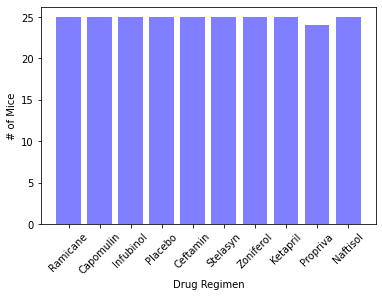

In [207]:
plt.bar(Drug_regimen_list, count_regimen, color='blue', alpha=0.5,align="center")
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')


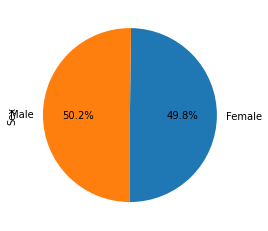

In [270]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_list = uniqueList["Sex"].unique()
gender_group = mouse_metadata.groupby('Sex')
count_gender = gender_group['Sex'].count()
#count_gender

#Mice_gender.plot(kind="pie")
count_gender.plot(kind="pie", startangle = 270, autopct="%1.1f%%")
plt.show()


(-1.1009347297692742,
 1.1017685314144796,
 -1.1000791940320744,
 1.1016630746735625)

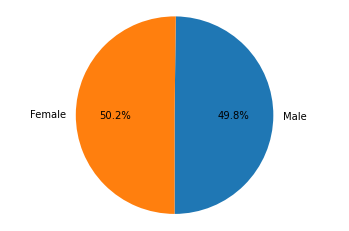

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_gender, labels=gender_list, autopct="%1.1f%%", startangle=270)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [282]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = uniqueList.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
uniqueList2 = max_tumor.merge(uniqueList,on=['Mouse ID','Timepoint'],how="left")

#  Get all the data for each regimen
CapData = uniqueList2.loc[uniqueList2['Drug Regimen'] == "Capomulin"]["Tumor Volume (mm3)"]
RamData = uniqueList2.loc[uniqueList2['Drug Regimen'] == "Ramicane"]["Tumor Volume (mm3)"]
InfData = uniqueList2.loc[uniqueList2['Drug Regimen'] == "Infubinol"]["Tumor Volume (mm3)"]
CefData = uniqueList2.loc[uniqueList2['Drug Regimen'] == "Ceftamin"]["Tumor Volume (mm3)"]


In [296]:

regimen=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# regimen name for individual calcs [A, B, C, D]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
A_quartiles = CapData.quantile([.25,.5,.75])
A_lower = A_quartiles[.25]
A_upper = A_quartiles[.75]
A_iqr = A_upper - A_lower
A_LB = A_lower- (1.5*A_iqr)
A_UB = A_upper +(1.5*A_iqr)

print(f"Values below {A_LB} could be outliers.")
print(f"Values above {A_UB} could be outliers.")   

A_outliers = CapData.loc[(CapData < A_LB) | (CapData> A_UB)]
A_outliers

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [299]:
B_quartiles = RamData.quantile([.25,.5,.75])
B_lower = B_quartiles[.25]
B_upper = B_quartiles[.75]
B_iqr = B_upper - B_lower
B_LB = B_lower- (1.5*B_iqr)
B_UB = B_upper +(1.5*B_iqr)

print(f"Values below {B_LB} could be outliers.")
print(f"Values above {B_UB} could be outliers.")   
B_outliers = RamData.loc[(RamData <B_LB) | (RamData> B_UB)]
B_outliers

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [298]:
C_quartiles = InfData.quantile([.25,.5,.75])
C_lower = C_quartiles[.25]
C_upper = C_quartiles[.75]
C_iqr = C_upper - C_lower
C_LB = C_lower- (1.5*C_iqr)
C_UB = C_upper +(1.5*C_iqr)

print(f"Values below {C_LB} could be outliers.")
print(f"Values above {C_UB} could be outliers.")  
C_outliers = InfData.loc[(InfData < C_LB) | (InfData> C_UB)]
C_outliers

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [297]:
C_quartiles = CefData.quantile([.25,.5,.75])
D_lower = C_quartiles[.25]
D_upper = C_quartiles[.75]
D_iqr = D_upper - D_lower
D_LB = D_lower- (1.5*D_iqr)
D_UB = D_upper +(1.5*D_iqr)

print(f"Values below {D_LB} could be outliers.")
print(f"Values above {D_UB} could be outliers.")   
  
D_outliers = CefData.loc[(CefData < D_LB) | (CefData> D_UB)]
D_outliers

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

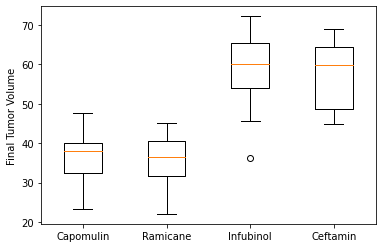

In [291]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([CapData, RamData, InfData, CefData], labels =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.ylabel("Final Tumor Volume")

plt.show()

## Line and Scatter Plots

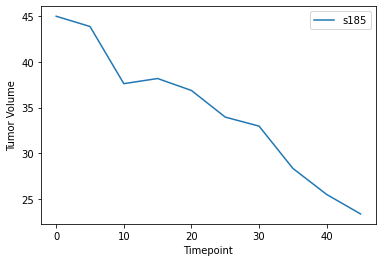

In [254]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (picked s185)

x_axis = uniqueList.loc[uniqueList['Drug Regimen'] == "Capomulin"]
mousedata = x_axis.loc[x_axis['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'], label ="s185")
                       

# Create a legend for our chart
plt.legend(loc="best")

# Show the chart
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()



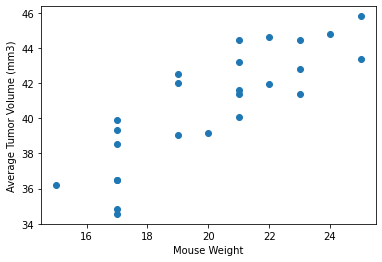

In [238]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

CapomulinData = uniqueList.loc[uniqueList['Drug Regimen'] == "Capomulin"]
groupedMice = CapomulinData.groupby(['Mouse ID'])
avgtumorVolpermice = groupedMice["Tumor Volume (mm3)"].mean()
Weight =groupedMice["Weight (g)"].mean()


# Plot for capomulin

plt.scatter(Weight, avgtumorVolpermice)


plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [239]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(Weight,avgtumorVolpermice)

print(f"Correlation : {round(correlation[0],2)}")


Correlation : 0.84


In [240]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, avgtumorVolpermice)
regress_values = Weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)
print(f"r-squared: {rvalue**2}")

y = 0.95x + 21.55
r-squared: 0.7088568047708717
